In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
!cp drive/superheroes/CAX_Superhero_Test.zip /content/

In [0]:
!cp drive/superheroes/CAX_Superhero_Train.zip /content/

In [188]:
!ls

CAX_Superhero_Test	CAX_Superhero_Train	 datalab  __MACOSX
CAX_Superhero_Test.zip	CAX_Superhero_Train.zip  drive


In [0]:
!unzip -q CAX_Superhero_Train.zip

In [0]:
!unzip -q CAX_Superhero_Test.zip

In [0]:
!ls

CAX_Superhero_Test	CAX_Superhero_Train	 datalab  __MACOSX
CAX_Superhero_Test.zip	CAX_Superhero_Train.zip  drive


In [0]:
import os

In [0]:
from scipy.misc import imread,imresize,imshow

In [0]:

import numpy as np

In [0]:
import matplotlib.pyplot as plt

In [0]:


!rm /content/CAX_Superhero_Train/Superman/cax_superman_train4738.jpg

In [0]:
!rm "/content/CAX_Superhero_Train/Iron Man/9221cax.jpg"

In [0]:

!rm "/content/CAX_Superhero_Train/Black Panther/4736cax.jpg"

In [0]:
!rm /content/CAX_Superhero_Train/Hulk/8613cax.jpg

In [0]:
!rm /content/CAX_Superhero_Train/Hulk/8145cax.jpg

In [0]:
!rm /content/CAX_Superhero_Train/Aquaman/1491cax.jpg

In [173]:
!ls

CAX_Superhero_Test	CAX_Superhero_Train	 datalab  __MACOSX
CAX_Superhero_Test.zip	CAX_Superhero_Train.zip  drive


In [0]:
######################### preparing the train data -- x_train #####################################


import numpy as np
count =0
dir_count =-1
temp = []
y_train = []
rootDir = '/content/CAX_Superhero_Train/'
for dirName, subdirList, fileList in os.walk(rootDir):
    
    dir_count+=1
    print dir_count, dirName
  
    for fname in fileList:
          if "cax" in fname:
             ##print('\t%s' % fname)
                y_train.append(dir_count - 1)
                count +=1
                temp.append(str(dirName+"/"+fname))



# img_set = set(im.shape for im in temp)
# if(len(img_set)!=1):
#        print "not all images of same dims",len(img_set),img_set
# else:
#        print "all images of same dims", img_set
    

          
x_train = np.array(temp)
y_train = np.array(y_train)

del temp

import gc
gc.collect()


0 /content/CAX_Superhero_Train/
1 /content/CAX_Superhero_Train/Iron Man
2 /content/CAX_Superhero_Train/Superman
3 /content/CAX_Superhero_Train/Aquaman
4 /content/CAX_Superhero_Train/Hulk
5 /content/CAX_Superhero_Train/Ant-Man
6 /content/CAX_Superhero_Train/Catwoman
7 /content/CAX_Superhero_Train/Avengers
8 /content/CAX_Superhero_Train/Batman
9 /content/CAX_Superhero_Train/Black Panther
10 /content/CAX_Superhero_Train/Captain America
11 /content/CAX_Superhero_Train/Spiderman
12 /content/CAX_Superhero_Train/Ghost Rider


749

In [0]:
######################### preparing the test data -- x_test for evaluation purpose #####################################

count =0
dir_count =-1
temp1 = []
from collections import defaultdict
dict1 = defaultdict(list)
rootDir = '/content/CAX_Superhero_Test'
for dirName, subdirList, fileList in os.walk(rootDir):
   
    for fname in fileList:
            if "superhero" in fname:      
                    count +=1

                    img = imread(rootDir+"/"+fname)

                    img = imresize(img,(180,180))


                    ##print count, dirName+"/"+fname
                    ##dict1[img.shape].append(dirName+"/"+fname)

                    temp1.append(img.astype('float32'))


print len(temp1)
img_set = set(im.shape for im in temp1)
if(len(img_set)!=1):
       print "not all images of same dims",len(img_set),img_set
else:
       print "all images of same dims", img_set
    

          
x_test = np.array(temp1)


In [0]:
import tensorflow


In [0]:
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD,Adam
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils


In [0]:
seed = 7
np.random.seed(seed)

In [0]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.layers import Input, Add
from sklearn.metrics import confusion_matrix
from keras.regularizers import l2

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x_train, y_train, test_size = 0.2)
train_ids = zip(x_train, y_train)
valid_ids = zip(x_test, y_test)

In [189]:
print x_train.shape, y_train.shape, x_test.shape, y_test.shape

(10808,) (10808,) (2702,) (2702,)


In [0]:
reg_lambda = 0.001

inputs = Input(shape=(224,224,3))
x1 = Conv2D(16, (3,3), padding='same', activation='relu', kernel_regularizer=l2(reg_lambda))(inputs)
x2 = Conv2D(16, (3,3), padding='same', activation='relu', kernel_regularizer=l2(reg_lambda))(x1)
x2 = Add()([x1,x2])
x2 = MaxPooling2D()(x2)
x3 = Conv2D(32, (3,3), padding='same', activation='relu', kernel_regularizer=l2(reg_lambda))(x2)
x4 = Conv2D(32, (3,3), padding='same', activation='relu', kernel_regularizer=l2(reg_lambda))(x3)
x4 = Add()([x3, x4])
x4 = MaxPooling2D()(x4)
x5 = Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer=l2(reg_lambda))(x4)
x6 = Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer=l2(reg_lambda))(x5)
x6 = Add()([x5,x6])
x6 = MaxPooling2D()(x6)
x7 = Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer=l2(reg_lambda))(x6)
x8 = Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer=l2(reg_lambda))(x7)
x8 = Add()([x7,x8])
x8 = MaxPooling2D()(x8)
x9 = Conv2D(256, (3,3), padding='same', activation='relu', kernel_regularizer=l2(reg_lambda))(x8)
x10 = Conv2D(256, (3,3), padding='same', activation='relu', kernel_regularizer=l2(reg_lambda))(x9)
x10 = Add()([x9,x10])
x10 = MaxPooling2D()(x10)
x11 = Conv2D(512, (3,3), padding='same', activation='relu', kernel_regularizer=l2(reg_lambda))(x10)
x12 = Conv2D(512, (3,3), padding='same', activation='relu', kernel_regularizer=l2(reg_lambda))(x11)
x12 = Add()([x11, x12])
x12 = MaxPooling2D()(x12)
x = Conv2D(512, (3,3), activation='relu', kernel_regularizer=l2(reg_lambda))(x12)
x = Flatten()(x)
predictions = Dense(12, activation='softmax', kernel_regularizer=l2(reg_lambda))(x)



model_final = Model(inputs=inputs, outputs=predictions)

lrate = 0.0001
adam = Adam(lr=lrate, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model_final.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [0]:
for i, n in enumerate(model_final.layers):
  print i ,n
  

In [0]:
print model_final.summary()

In [0]:
#fit_generator
batch_size = 16
train_params = {'dim_x': 224,
          'dim_y': 224,
          'dim_z': 3,
          'batch_size': batch_size,
          'shuffle': True}

train_gen = DataGenerator(**train_params)
train_gen.fit(train_ids)
trining_generator = train_gen.generate(train_ids)
train_means = train_gen.get_means

valid_params = {'dim_x': 224,
          'dim_y': 224,
          'dim_z': 3,
          'batch_size': batch_size,
          'shuffle': False,
          'test': True,
          'train_means': train_means}
validation_generator = DataGenerator(**valid_params).generate(valid_ids)


train_steps = len(train_ids)/batch_size
valid_steps = len(valid_ids)/batch_size



In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

filepath = "drive/superheroes/model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True)
early_stopper = EarlyStopping(monitor='val_loss', patience=3)
callbacks_list = [early_stopper]

History = model_final.fit_generator(generator = training_generator,
                    steps_per_epoch = train_steps,
                    validation_data = validation_generator,
                    validation_steps = valid_steps,
                    epochs=40,
                    callbacks = callbacks_list)


Epoch 1/40
675/675 [==============================] - 129s 191ms/step - loss: 3.4907 - acc: 0.2129 - val_loss: 3.5222 - val_acc: 0.1611
Epoch 2/40
167/675 [======>.......................] - ETA: 1:24 - loss: 2.6821 - acc: 0.3424

675/675 [==============================] - 125s 185ms/step - loss: 2.4585 - acc: 0.3940 - val_loss: 2.9340 - val_acc: 0.2504
Epoch 3/40
272/675 [===========>..................] - ETA: 1:07 - loss: 2.1356 - acc: 0.4701

675/675 [==============================] - 125s 185ms/step - loss: 2.0545 - acc: 0.4960 - val_loss: 3.0199 - val_acc: 0.1834
Epoch 4/40
311/675 [============>.................] - ETA: 1:00 - loss: 1.8643 - acc: 0.5500

675/675 [==============================] - 124s 184ms/step - loss: 1.8146 - acc: 0.5596 - val_loss: 2.7811 - val_acc: 0.2247
Epoch 5/40
326/675 [=============>................] - ETA: 58s - loss: 1.6948 - acc: 0.5801

675/675 [==============================] - 124s 184ms/step - loss: 1.6872 - acc: 0.5842 - val_loss: 2.4257 - val_acc: 0.3397
Epoch 6/40
331/675 [=============>................] - ETA: 57s - loss: 1.6119 - acc: 0.6090

675/675 [==============================] - 125s 186ms/step - loss: 1.5883 - acc: 0.6118 - val_loss: 2.8451 - val_acc: 0.2325
Epoch 7/40
333/675 [=============>................] - ETA: 57s - loss: 1.4935 - acc: 0.6329

675/675 [==============================] - 125s 186ms/step - loss: 1.4956 - acc: 0.6315 - val_loss: 2.4789 - val_acc: 0.3490
Epoch 8/40
334/675 [=============>................] - ETA: 56s - loss: 1.4548 - acc: 0.6446

675/675 [==============================] - 125s 186ms/step - loss: 1.4280 - acc: 0.6539 - val_loss: 2.3630 - val_acc: 0.3813
Epoch 9/40
334/675 [=============>................] - ETA: 57s - loss: 1.3359 - acc: 0.6931

675/675 [==============================] - 125s 186ms/step - loss: 1.3289 - acc: 0.6895 - val_loss: 2.3776 - val_acc: 0.3739
Epoch 10/40
333/675 [=============>................] - ETA: 57s - loss: 1.2515 - acc: 0.7143

675/675 [==============================] - 125s 186ms/step - loss: 1.2479 - acc: 0.7169 - val_loss: 2.4848 - val_acc: 0.3653
Epoch 11/40
332/675 [=============>................] - ETA: 57s - loss: 1.1764 - acc: 0.7387

675/675 [==============================] - 125s 186ms/step - loss: 1.1600 - acc: 0.7457 - val_loss: 2.3253 - val_acc: 0.4059
Epoch 12/40
183/675 [=======>......................] - ETA: 1:22 - loss: 1.1445 - acc: 0.7445

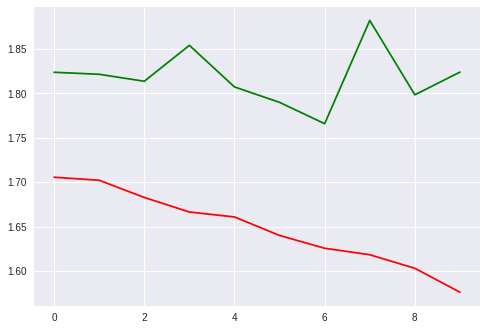

In [0]:
plt.plot(History.history['loss'], 'r')
plt.plot(History.history['val_loss'], 'g')

In [0]:
labels = ['iron_man',
'super_man',
'aqua_man',
'hulk',
'ant_man',
'cat_woman',
'avengers',
'bat_man',
'black_panther',
'captain_america',
'spider_man',
'ghostrider']


In [0]:
cm = confusion_matrix(y_test, target_class[:y_test.shape[0]])
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)

plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)

plt.show()

In [0]:
class DataGenerator(object):
  'Generates data for Keras'
  def __init__(self, dim_x = 224, dim_y = 224, dim_z = 3, batch_size = 16, shuffle = True, test=False, train_means=None):
      'Initialization'
      self.dim_x = dim_x
      self.dim_y = dim_y
      self.dim_z = dim_z
      self.batch_size = batch_size
      self.shuffle = shuffle
      
      if test:
        self.means = train_means
      else:
        self.means = np.zeros((self.dim_z,))
        
        
  @property
  def get_means(self):
    return self.means
  
  def fit(self, list_IDs):
    for ID in list_IDs:
      img = imread(ID[0])
      img = imresize(img,(224,224))
      self.means += np.mean(img, axis=(0,1))
      
    self.means /= len(list_IDs)
    return 

  def generate(self, list_IDs):
      'Generates batches of samples'
      # Infinite loop
      while 1:
          # Generate order of exploration of dataset
          indexes = self.__get_exploration_order(list_IDs)

          # Generate batches
          imax = int(len(indexes)/self.batch_size)
          for i in range(imax):
              # Find list of IDs
              list_IDs_temp = [list_IDs[k] for k in indexes[i*self.batch_size:(i+1)*self.batch_size]]

              # Generate data
              X, y = self.__data_generation(list_IDs_temp)

              yield X, y

  def __get_exploration_order(self, list_IDs):
      'Generates order of exploration'
      # Find exploration order
      indexes = np.arange(len(list_IDs))
      if self.shuffle == True:
          np.random.shuffle(indexes)

      return indexes

  def __data_generation(self, list_IDs_temp):
      'Generates data of batch_size samples' # X : (n_samples, v_size, v_size, v_size, n_channels)
      # Initialization
      X = np.empty((self.batch_size, self.dim_x, self.dim_y, self.dim_z), dtype = np.float32)
      y = np.empty((self.batch_size), dtype = int)

      # Generate data
      for i, ID in enumerate(list_IDs_temp):
          # Store volume
          img = imread(ID[0])

          try:
            img = imresize(img,(224,224))
            img = img.astype(np.float32)
            img -= self.means
            img /= 255.
          except:
            print 'mode error: %s' %ID[0]
          
          
          
          assert ((img.shape[0] == self.dim_x) and (img.shape[1] == self.dim_y) and (img.shape[2] == self.dim_z)), "%d %d %d %s" %(img.shape[0], img.shape[1], img.shape[2], ID[0])
                               
          X[i, :, :, :] = img

          # Store class
          y[i] = ID[1]

      return X, sparsify(y)

def sparsify(y):
  'Returns labels in binary NumPy array'
  n_classes = 12 # Enter number of classes
  return np.array([[1 if y[i] == j else 0 for j in range(n_classes)]
                   for i in range(y.shape[0])])

In [0]:
f = np.random.randint(0, 255, (224,224,3))

In [0]:
(f - np.mean(f, axis=(0,1))).shape

(224, 224, 3)